# Training a Classifier

## Loading and Normalizing CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data',
                                        train = True,
                                        download = True,
                                        transform = transform)

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data


In [4]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 4,
                                          shuffle = True,
                                          num_workers = 2)

In [26]:
testset = torchvision.datasets.CIFAR10(root = './data',
                                       train = False,
                                       download = True,
                                       transform=transform)

Files already downloaded and verified


In [27]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 4,
                                         shuffle = False,
                                         num_workers = 0)

In [28]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
           'frog', 'horse', 'ship', 'truck')

### Show image

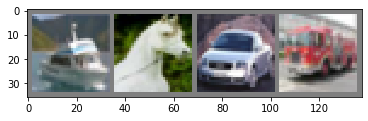

 ship horse   car truck


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define a Convolutional Neural Network

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Define a Loss function and optimizer

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train the network

In [12]:
for epoch in range(2): # loop over the dataset multiples times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameters gradients
        optimizer.zero_grad()
        
        # forward + backward + optimizer
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print("[{}, {}] loss: {}".format(epoch+1,
                                             i+1,
                                             running_loss/2000))
            running_loss = 0.0

print("Finished Training")

[1, 2000] loss: 2.1894626907706263
[1, 4000] loss: 1.8511647087335588
[1, 6000] loss: 1.666364825040102
[1, 8000] loss: 1.5567456973195075
[1, 10000] loss: 1.4971529922932387
[1, 12000] loss: 1.4709948805943132
[2, 2000] loss: 1.4056156492754817
[2, 4000] loss: 1.3672712188661098
[2, 6000] loss: 1.3213420695140958
[2, 8000] loss: 1.3179045848734676
[2, 10000] loss: 1.2721695732474327
[2, 12000] loss: 1.2896900409907102
Finished Training


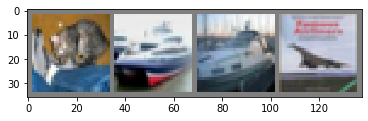

GroundTruth:   cat  ship  ship plane


In [29]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [33]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [34]:
inputs, labels = data[0].to(device), data[1].to(device)